#E/17/219
#Nawarathna K.G.I.S.
#CO544 : Lab 05

In [90]:
#importing libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier     # Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics                         # scikit-learn metrics module for computing accuracy

In [91]:
#importing warnings to ignore them
import warnings
warnings.filterwarnings('ignore')                   # Ignore warning messages

In [92]:
#filename of the dataset file
filename = "wine.csv"

##Loading the dataset

In [93]:
#read the dataset as a csv file by seperating each rows by a new line
wine_df = pd.read_csv(filename,header=None, sep='\n')

#turn the row into a string and seperate that using the comma
wine_df = wine_df[0].str.split(',', expand=True)

#drop the last row
wine_df = wine_df.drop(wine_df.columns[14],axis=1)

#get the new dataset after dropping the heading of the dataset
wine_df = wine_df.drop(index=0)

#print the head of the dataset
wine_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
2,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050,1
3,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185,1
4,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480,1
5,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1
6,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
7,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290,1
8,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
9,14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045,1
10,13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [94]:
#reanme the columns of the data
col_names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280_od315', 'proline', 'class'] # Define new column names

#renameing the coulmns of the dataframe
wine_df.columns = col_names

#print the head
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline,class
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
2,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050,1
3,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185,1
4,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480,1
5,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [95]:
#check the shape of the dataframe
wine_df.shape

(178, 14)

In [96]:
#check the summary of the dataframe
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 178
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   alcohol               178 non-null    object
 1   malic_acid            178 non-null    object
 2   ash                   178 non-null    object
 3   alcalinity_of_ash     178 non-null    object
 4   magnesium             178 non-null    object
 5   total_phenols         178 non-null    object
 6   flavanoids            178 non-null    object
 7   nonflavanoid_phenols  178 non-null    object
 8   proanthocyanins       178 non-null    object
 9   color_intensity       178 non-null    object
 10  hue                   178 non-null    object
 11  od280_od315           178 non-null    object
 12  proline               178 non-null    object
 13  class                 178 non-null    object
dtypes: object(14)
memory usage: 20.9+ KB


In [97]:
wine_df['class'].value_counts() # Exploring target variable

2    71
1    59
3    48
Name: class, dtype: int64

## Defining feature vector and target variable

In [98]:
X = wine_df.drop(['class'], axis=1) # Drop the target variable
y = wine_df['class']
X, y

(    alcohol malic_acid   ash alcalinity_of_ash magnesium total_phenols  \
 1     14.23       1.71  2.43              15.6       127           2.8   
 2      13.2       1.78  2.14              11.2       100          2.65   
 3     13.16       2.36  2.67              18.6       101           2.8   
 4     14.37       1.95   2.5              16.8       113          3.85   
 5     13.24       2.59  2.87                21       118           2.8   
 ..      ...        ...   ...               ...       ...           ...   
 174   13.71       5.65  2.45              20.5        95          1.68   
 175    13.4       3.91  2.48                23       102           1.8   
 176   13.27       4.28  2.26                20       120          1.59   
 177   13.17       2.59  2.37                20       120          1.65   
 178   14.13        4.1  2.74              24.5        96          2.05   
 
     flavanoids nonflavanoid_phenols proanthocyanins color_intensity   hue  \
 1         3.06     

##Splitting data

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 75% training and 25% test
X_train.shape, X_test.shape         # Shapes of X_train and X_test

((133, 13), (45, 13))

##Decision tree with the Gini as index

### Building decision tree classifier with the Gini index criterion

In [100]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0) # Create decision tree classifier object
clf_gini.fit(X_train, y_train)      # Train the classifier

DecisionTreeClassifier(max_depth=4, random_state=0)

###Predicting results for the test set

In [101]:
y_pred = clf_gini.predict(X_test)
y_pred

array(['3', '2', '1', '2', '1', '3', '2', '1', '3', '2', '1', '1', '2',
       '1', '2', '2', '3', '1', '2', '1', '1', '2', '3', '2', '1', '3',
       '1', '1', '1', '3', '2', '3', '3', '1', '2', '2', '3', '1', '2',
       '1', '1', '2', '3', '1', '1'], dtype=object)

###Evaluating model

In [102]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


###Confusion matrix

In [103]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[18,  0,  0],
       [ 1, 15,  1],
       [ 0,  0, 10]])

### Visualizing decision trees

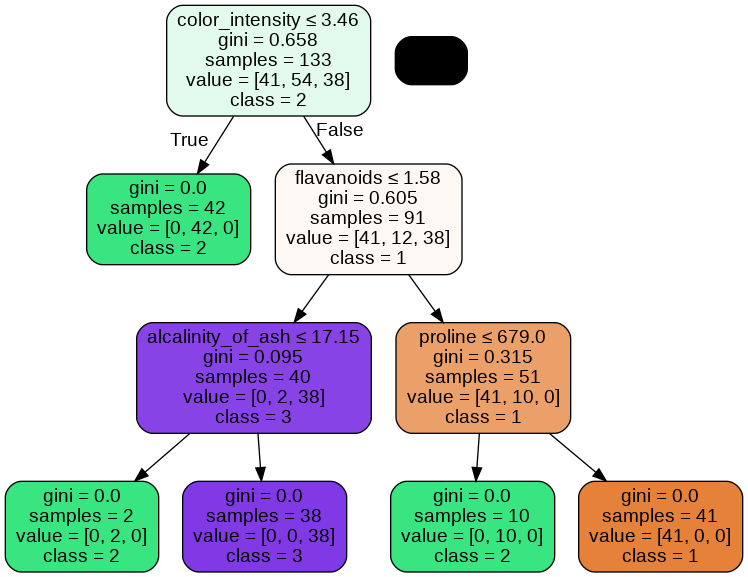

In [104]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X.columns, class_names=['1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wine.png')
Image(graph.create_png())

### Classification report

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.88      0.94        17
           3       0.91      1.00      0.95        10

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.95        45



##Decision tree with Entropy as the index

### Building decision tree classifier with the Gini index criterion

In [106]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0) # Create decision tree classifier object
clf_entropy.fit(X_train, y_train)      # Train the classifier

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

###Predicting results for the test set

In [107]:
y_pred = clf_entropy.predict(X_test)
y_pred

array(['3', '2', '1', '2', '1', '3', '2', '1', '3', '2', '1', '2', '2',
       '1', '2', '2', '3', '1', '2', '1', '1', '2', '3', '1', '1', '3',
       '1', '1', '1', '3', '2', '3', '3', '1', '2', '2', '2', '2', '2',
       '1', '1', '2', '3', '1', '1'], dtype=object)

###Evaluating model

In [108]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


###Confusion matrix

In [109]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[17,  1,  0],
       [ 1, 16,  0],
       [ 0,  0, 10]])

### Visualizing decision trees

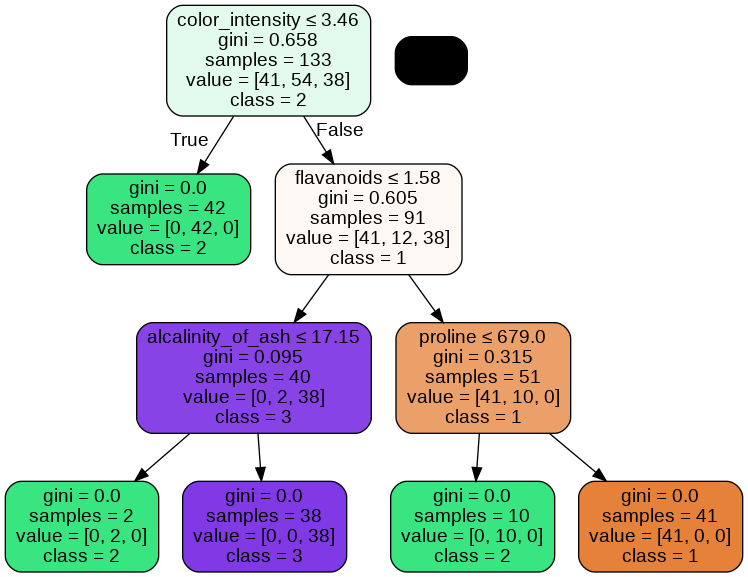

In [110]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X.columns, class_names=['1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wine.png')
Image(graph.create_png())

### Classification report

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.88      0.94        17
           3       0.91      1.00      0.95        10

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.95        45



##Pruning for the gini indexed decision tree model

Let see the alpha parameters or the smoothing parameter of the decision tree model we have built in gini indexed version.

In [79]:
path = clf_gini.cost_complexity_pruning_path(X_train, y_train)
alphas, impurities = path.ccp_alphas, path.impurities
alphas

array([0.        , 0.02857143, 0.12089046, 0.25451322])

We can see that there are 4 alphas related to our model. We can implement decision trees for all of those alpha values and train those models.

In [80]:
clfs = []
for alpha in alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Now we need to see the accuracy of each model(corresponding to each alpha) and determine the most suitable alpha that gives the best accuracy for both training and test datasets.

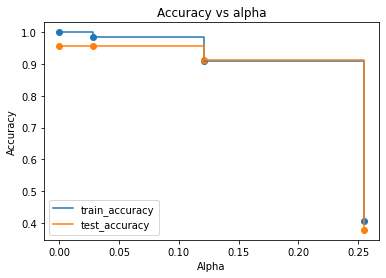

In [81]:
import matplotlib.pyplot as plt

train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(metrics.accuracy_score(y_train_pred,y_train))
    test_acc.append(metrics.accuracy_score(y_test_pred,y_test))

plt.scatter(alphas,train_acc)
plt.scatter(alphas,test_acc)
plt.plot(alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.title('Accuracy vs alpha')
plt.show()

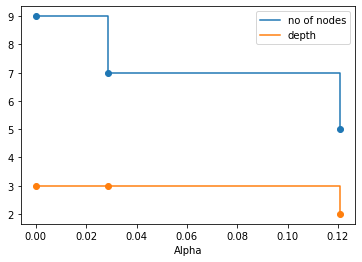

In [82]:
clfs = clfs[:-1]
alphas = alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(alphas,node_counts)
plt.scatter(alphas,depth)
plt.plot(alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(alphas,depth,label='depth',drawstyle="steps-post")
plt.xlabel("Alpha")
plt.legend()
plt.show()